<h1>Analyzing Drug Poisoning Mortality in the United States for Years 1999-2015</h1>
<img src="http://pinnacleemergency.co/wp-content/uploads/2016/07/Drug-Overdose.jpg" alt="drug" width="242" height="242" style="float:left">
<img src="http://www.womenshealth.northwestern.edu/sites/womenshealth/files/wp-content/uploads/2010/03/pillsiStock_000003993552Small-300x199.jpg" alt="drug" width="242" height="242" style="float:left">
<img src="https://images.emedicinehealth.com/images/slideshow/prescription-drug-abuse-s1-what-is.jpg" alt="drug" width="242" height="242" style="float:left">
<img src="https://www.drugabuse.com/wp-content/uploads/drugabuse-shutter399858829-overdose.jpg" alt="drug" width="242" height="242" style="float:left">

<h2>Liya Ketema &amp; Ingrid Lim</h2>
<h3>December 16, 2017</h3>

<h2>Introduction</h2>
<p>Reports of drug poisoning, more commonly known as drug overdose, have been said to be more rampant recently. In this tutorial, we will explore whether there is a trend of drug poisoning mortality in the United States while considering factors such as age, sex, and race. We will also look motality per state in order to narrow down regions with highest increase throughout sixteen years between 1999 and 2015. 

In this tutorial, we are covering the following:
<ul>
    <li>We would first show how to collect and wrangle the data</li>
    <li>Using that data, we would then process, conduct analysis and visualize the data</li>
    <li>Based on the results from the previous step, we would come up with a hypothesis to test.
    <li>Last but not the least, we would then demonstrate how to test the given hypothesis using machine learning</li> 
</ul>

<h2>Tools Required:</h2>
<ul>
<li> Python 3.5 with the following libraries:
    <ul>
    <li>pandas</li>
    <li>numpy</li>
    <li>matplotlib.pyplot</li>
    <li>scikit-learn</li> 
    <li>plotly
        <ul> <li>If using Anaconda Python package, this library is included. However, if using docker, plotly has to be !pip installed before each use (shown below).</li>
        <li>The heat maps in this tutorial requires an online account and api key set on machine. Follow instructions <a href="https://plot.ly/pandas/getting-started/"> here</a>.
        </ul>
    <li>Scipy.stats
    </ul>
</li>
<li> The Drug Poisoning Mortality Dataset, which can be downloaded from <a href='https://catalog.data.gov/dataset/drug-poisoning-mortality-u-s-and-state-trends-united-states-20022014'>here</a>. Make sure to download the CSV file.</li>
</ul>
<p><i>If you want to explore the libraries listed above, all tutorials for the libraries will be linked in the <a href="#references">References</a> section down below.</i></p>

<h2>1. Data Collection and Wrangling</h2>
<p>To get started, import the following libraries that you have installed below. </p>

In [1]:
# If using Anaconda, comment line command below.
# If using Docker, use this command for viewing maps:
#!pip install plotly 

import pandas as pd # Use dataframes
import numpy as np # For mathematical operations on arrays
import matplotlib.pyplot as plt # To visualize data
import re # Regular expression - sorting of some sort
from sklearn import linear_model  # Linear regression - best fit line
import plotly 
from scipy.stats import chisquare # Statistics testing.

plotly.offline.init_notebook_mode(connected=True) # Run the plotly maps in offline mode for jupyter notebook display

<a name="collect"></a><h3>1.1 Data Collection</h3>
<p>The first step is to read the data contained in the downloaded comma separated value (CSV) file and convert it into a pandas dataframe structure. This will allow us to manipulate the data easier. Some caution: for convenience, the name of the downloaded file has been slightly changed for readbility.</p>

In [2]:
drug_poison_df = pd.read_csv('NCHS_Drug_Poisoning_Mortality_by_State_United_States.csv')
drug_poison_df.head() # shows the first five entries of the data frame

,Year,Sex,Age,Race and Hispanic Origin,State,Deaths,Population,Crude Death Rate,Standard Error for Crude Rate,Low Confidence Limit for Crude Rate,Upper Confidence Limit for Crude Rate,Age-adjusted Rate,Standard Error Age-adjusted Rate,Lower Confidence Limit for Age-adjusted rate,Upper Confidence Limit for Age-adjusted Rate,State Crude Rate in Range,US Crude Rate,US Age-adjusted Rate
0,1999,Both Sexes,All Ages,All Races-All Origins,Alabama,169,4430143,3.8,0.3,3.2,4.4,3.9,0.3,3.3,4.4,1.8–7,6.0,6.1
1,2000,Both Sexes,All Ages,All Races-All Origins,Alabama,197,4447100,4.4,0.3,3.8,5.0,4.5,0.3,3.9,5.1,1.8–7,6.2,6.2
2,2001,Both Sexes,All Ages,All Races-All Origins,Alabama,216,4467634,4.8,0.3,4.2,5.5,4.9,0.3,4.2,5.5,1.8–7,6.8,6.8
3,2002,Both Sexes,All Ages,All Races-All Origins,Alabama,211,4480089,4.7,0.3,4.1,5.3,4.8,0.3,4.1,5.4,1.8–7,8.2,8.2
4,2003,Both Sexes,All Ages,All Races-All Origins,Alabama,197,4503491,4.4,0.3,3.8,5.0,4.4,0.3,3.8,5.1,1.8–7,8.9,8.9


<p></p><p>As shown above, the table contains several standard error calculations, which we will not be looking at. We are going to drop those columns in order to have a cleaner, more organized dataframe. To do this, we are going to use 'drop' starting at the 'Crude Death Rate' column (7) all the way up to 'US Age-adjusted Rate' column (18). </p>

In [3]:
# There are total of 18 columns, drop all columns after 'Population' -- which is after column number 7
drug_poison_df.drop(drug_poison_df.columns[7:18], axis=1, inplace=True)
drug_poison_df.head()

,Year,Sex,Age,Race and Hispanic Origin,State,Deaths,Population
0,1999,Both Sexes,All Ages,All Races-All Origins,Alabama,169,4430143
1,2000,Both Sexes,All Ages,All Races-All Origins,Alabama,197,4447100
2,2001,Both Sexes,All Ages,All Races-All Origins,Alabama,216,4467634
3,2002,Both Sexes,All Ages,All Races-All Origins,Alabama,211,4480089
4,2003,Both Sexes,All Ages,All Races-All Origins,Alabama,197,4503491


<p> After the cleanup, we can see that the table has drug posioning death examined for multiple variables: such as year, state, age, and race. We will be dividing by these variables and examining the death rate variation among them. Before doing so, we want to fist see which unique categories are contained within each variable. This will be done by using the pandas builtin unique() function.</p>

In [4]:
# Obtain unique values used for each category and display by printing..
years = drug_poison_df.Year.unique().tolist()
print("\nUnique Years from which data was obtained from: \n\t", years )

sex = drug_poison_df.Sex.unique().tolist()
print("Unique Sex category: \n\t", sex)

age = drug_poison_df.Age.unique().tolist()
print("Unique Age groups: \n\t", age)

race = drug_poison_df['Race and Hispanic Origin'].unique().tolist()
print("Unique Race and Hispanic Origin: \n\t", race)

states = drug_poison_df.State.unique().tolist()
print("\nUnique state catogries: \n\t", states)


Unique Years from which data was obtained from: 
	 [1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
Unique Sex category: 
	 ['Both Sexes', 'Female', 'Male']
Unique Age groups: 
	 ['All Ages', 'Less than 15 years', '15-24 years', '25-34 years', '35-44 years', '45-54 years', '55-64 years', '65-74 years', '75+ years']
Unique Race and Hispanic Origin: 
	 ['All Races-All Origins', 'Hispanic', 'Non-Hispanic Black', 'Non-Hispanic White']

Unique state catogries: 
	 ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'United States', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'O

<p>The states from the data are given by either each of the 50 states &amp; DC and United States as a whole, we have to remove United States from the list of states. This step is necessary to avoid double counting the number of deaths by drug poisoning. But we will keep DC as a state.</p>

In [5]:
states = [state for state in states if state != 'United States']
print("States after removal of US : \n\t", states)

States after removal of US : 
	 ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


<h3>1.2 Data Wrangling </h3>
<p>Now we are going to start grouping the data into different variables, which we will use later as part of our analysis.</p>

<p>First we are going to group the data per year by using the groupby function and get_group() to get each individual group by year. This will solely group the United States' mortality rate per year - for both sexes, all age groups, and all races.</p>

In [6]:
# Groupby will separate these categories into dataframes
gr_year = drug_poison_df.groupby(['Year','Sex','Age','Race and Hispanic Origin', 'State'])
# Initialize the data frame by creating one for 1999
df_year = gr_year.get_group((1999, 'Both Sexes', 'All Ages', 'All Races-All Origins', 'United States'))

# We need to get each data frame for each year and append them together into df_year dataframe
for year in years:
    if year != 1999:
        temp_df = gr_year.get_group((year, 'Both Sexes', 'All Ages', 'All Races-All Origins', 'United States'))
        df_year = df_year.append(temp_df, ignore_index=True)

df_year.head()

,Year,Sex,Age,Race and Hispanic Origin,State,Deaths,Population
0,1999,Both Sexes,All Ages,All Races-All Origins,United States,16849,279040238
1,2000,Both Sexes,All Ages,All Races-All Origins,United States,17415,281421906
2,2001,Both Sexes,All Ages,All Races-All Origins,United States,19394,284968955
3,2002,Both Sexes,All Ages,All Races-All Origins,United States,23518,287625193
4,2003,Both Sexes,All Ages,All Races-All Origins,United States,25785,290107933


Now we will group the data by states to create one dataframe which contains data for each state from 1999-2015. All other factors are kept neutral, meaning that we will be looking at data for both sexes, all ages and all races. 

In [7]:
# Get states
gr_state = drug_poison_df.groupby('State')
# Initialize df_states -- collects all other dataframes for each state
df_states = gr_state.get_group('Alabama')

# For each state
for state in states:
    if state != 'Alabama':
        temp_df = gr_state.get_group(state)
        # append to the rest of the data frames contaning the states
        df_states = df_states.append(temp_df,  ignore_index=True)

df_states.head()

,Year,Sex,Age,Race and Hispanic Origin,State,Deaths,Population
0,1999,Both Sexes,All Ages,All Races-All Origins,Alabama,169,4430143
1,2000,Both Sexes,All Ages,All Races-All Origins,Alabama,197,4447100
2,2001,Both Sexes,All Ages,All Races-All Origins,Alabama,216,4467634
3,2002,Both Sexes,All Ages,All Races-All Origins,Alabama,211,4480089
4,2003,Both Sexes,All Ages,All Races-All Origins,Alabama,197,4503491


<p>Then, we will group by sex: either male or female. This ignores the 'Both Sexes' category to avoid duplications of data. The data frames divided by male or female are also subdivided into age groups and race/origin by year. We will look at the number of deaths per year for all ages and all races, all origins for each sex similar to the year and state variables.</p>

In [8]:
gr_sex = drug_poison_df.groupby(['Year','Sex','Age','Race and Hispanic Origin'])
# initialize each respective dataframe
df_male = gr_sex.get_group((1999, 'Male', 'All Ages', 'All Races-All Origins'))
df_female = gr_sex.get_group((1999, 'Female', 'All Ages', 'All Races-All Origins'))

# For each year
for year in years:
    if year != 1999: 
        # this segregates each year's data based on sex and saves to each respective dataframe
        temp_male = gr_sex.get_group((year, 'Male', 'All Ages', 'All Races-All Origins'))
        df_male = df_male.append(temp_male, ignore_index=True)
        
        temp_female = gr_sex.get_group((year, 'Female', 'All Ages', 'All Races-All Origins'))
        df_female = df_female.append(temp_female, ignore_index=True)
        
df_male.head()

,Year,Sex,Age,Race and Hispanic Origin,State,Deaths,Population
0,1999,Male,All Ages,All Races-All Origins,United States,11258,136802891
1,2000,Male,All Ages,All Races-All Origins,United States,11563,138053563
2,2001,Male,All Ages,All Races-All Origins,United States,12658,139891492
3,2002,Male,All Ages,All Races-All Origins,United States,15028,141230559
4,2003,Male,All Ages,All Races-All Origins,United States,16399,142428897


In [9]:
df_female.head()

,Year,Sex,Age,Race and Hispanic Origin,State,Deaths,Population
0,1999,Female,All Ages,All Races-All Origins,United States,5591,142237347
1,2000,Female,All Ages,All Races-All Origins,United States,5852,143368343
2,2001,Female,All Ages,All Races-All Origins,United States,6736,145077463
3,2002,Female,All Ages,All Races-All Origins,United States,8490,146394634
4,2003,Female,All Ages,All Races-All Origins,United States,9386,147679036


<p>The next dataframe will be based on unique age groups, for both sexes and all race. Similar to the above dataframes, in order to avoid duplication, the 'All Ages' rows will not be included.</p>

In [10]:
gr_age = drug_poison_df.groupby(['Year','Sex','Age','Race and Hispanic Origin'])
df_age = gr_age.get_group((1999,'Both Sexes','Less than 15 years','All Races-All Origins'))

ignore_first = 0
for ag in age:  # For each age group not including 'All Ages'
    if ag != 'All Ages':
        for year in years:
            if ignore_first == 0:
                # Since we have input valyes for 1999 and 'Less than 15 years', we have to ignore the duplication
                ignore_first += 1
            else:
                temp_df = gr_age.get_group((year, 'Both Sexes', ag,'All Races-All Origins'))
                df_age = df_age.append(temp_df, ignore_index=True)
                
df_age.head()

,Year,Sex,Age,Race and Hispanic Origin,State,Deaths,Population
0,1999,Both Sexes,Less than 15 years,All Races-All Origins,United States,74,59955378
1,2000,Both Sexes,Less than 15 years,All Races-All Origins,United States,74,60253375
2,2001,Both Sexes,Less than 15 years,All Races-All Origins,United States,91,60450257
3,2002,Both Sexes,Less than 15 years,All Races-All Origins,United States,97,60563030
4,2003,Both Sexes,Less than 15 years,All Races-All Origins,United States,100,60628650


Last but not the least, we group by race using the same process as above.

In [11]:
gr_race = drug_poison_df.groupby(['Year','Sex','Age','Race and Hispanic Origin'])
df_race = gr_age.get_group((1999,'Both Sexes','All Ages','Hispanic'))

ignore_first = 0
for ra in race:  # For each race group not including 'All races'
    if ra != 'All Races-All Origins':
        for year in years:
            if ignore_first == 0:
                # Since we have input vales for 1999 and 'Hispanic', we have to ignore the duplication
                ignore_first += 1
            else:
                temp_df = gr_age.get_group((year, 'Both Sexes', 'All Ages', ra))
                df_race = df_race.append(temp_df, ignore_index=True)
                
df_race.head()

,Year,Sex,Age,Race and Hispanic Origin,State,Deaths,Population
0,1999,Both Sexes,All Ages,Hispanic,United States,1669,33937845
1,2000,Both Sexes,All Ages,Hispanic,United States,1443,35305818
2,2001,Both Sexes,All Ages,Hispanic,United States,1483,37144096
3,2002,Both Sexes,All Ages,Hispanic,United States,1831,38617620
4,2003,Both Sexes,All Ages,Hispanic,United States,2009,40049429


<h2> 2. Data Analysis and Visualization</h2>

<p>Our next step after cleaning and formatting data is to do analyze the trend and visualize it. Almost all of our plots will be done using matplotlib library save for the plotly geographic map. </p>

<h3><a name="year_graph"></a>2.1 Analyzing and Visualizing the Rate of Death Per Year</h3>

<p>To analyze the rate (displayed in percent format), we have to compute the (number of deaths / population of that year) * 100, and then we plot in order to visualize if there are any trends. We will also include population unadjusted total number of deaths vs. year plot as comparison. The two plots will be combine to a single plot by using the twinx() function from matplotlib. polyfit() and polyval() will be used to display the average growth in the rate of deaths per year.</p>

In [12]:
# This line creates a new column to add the rate for each year
df_year['rate_percent'] = (df_year.Deaths / df_year.Population) * 100
df_year.head()

,Year,Sex,Age,Race and Hispanic Origin,State,Deaths,Population,rate_percent
0,1999,Both Sexes,All Ages,All Races-All Origins,United States,16849,279040238,0.006038
1,2000,Both Sexes,All Ages,All Races-All Origins,United States,17415,281421906,0.006188
2,2001,Both Sexes,All Ages,All Races-All Origins,United States,19394,284968955,0.006806
3,2002,Both Sexes,All Ages,All Races-All Origins,United States,23518,287625193,0.008177
4,2003,Both Sexes,All Ages,All Races-All Origins,United States,25785,290107933,0.008888


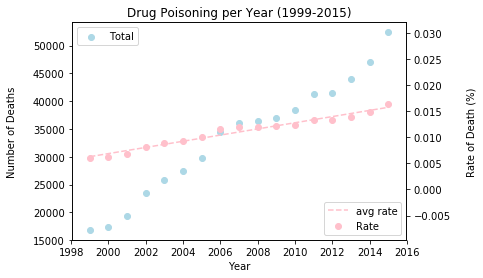

In [13]:
# create subplots and divide using twinx() to display two y-axis of different range.
fig, total_ax1 = plt.subplots()
rate_ax2 = total_ax1.twinx()

# Plots total vs. year and rate vs. year.
total_ax1.scatter(df_year.Year, df_year.Deaths, color='lightblue', label='Total')
rate_ax2.scatter(df_year.Year, df_year.rate_percent, color='pink', label='Rate')

# use polyfit to add a best fit line that will estimate the average increase in the rate of deaths per year 
rate_ax2.plot(df_year.Year, np.polyval(np.polyfit(df_year.Year, df_year.rate_percent, 1), df_year.Year), 
              label='avg rate', color='pink', linestyle='--')

# Label the graph
plt.title('Drug Poisoning per Year (1999-2015)')

total_ax1.set_xlabel('Year')
total_ax1.set_ylabel('Number of Deaths\n')
total_ax1.legend(loc='upper left')

rate_ax2.set_ylabel('\nRate of Death (%)')
rate_ax2.legend(loc='lower right')

plt.show() # Show the graph

<p>As shown by the graph, the number of drug poisoning is increasing per year with the exception of 2006-2008 where the rate of increase was close to 0. If the increase in the raw numbers of death was solely due to population increase, we would have seen a horizontal avg rate line (pink dash plot); however, the average rate is not zero. Therefore, we can conclude that there is a definite increase in the number of deaths from drug poisoning irrespective of population growth. </p>

<h3>2.2 Analyzing and Visualizing the Rate of Death Per State for Each Year</h3>
<p>Looking at the raw data and the analysis from above, we know that there is a clear increase in the number of deaths by drug poisoning. Our next step will be to see which states are the most affected by this increase.</p>

<p>To do this, we will look at increments of four years from 1999-2015, giving us five year groups. For this five years, we will examine population adjusted rate of death. This rate is converted to percent for convenience of displaying large decimal numbers on the heat map, which is constructed by using the plotly library. For working with USA geography in plotly, we need to convert full state names into their respective acronyms.</p>

In [14]:
acr = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE","DC", "FL", 
          "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", 
          "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", 
          "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", 
          "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

sta_acr = [(states[i],acr[i]) for i in range(len(states))]
state_acr = dict(sta_acr)
acronyms = [state_acr[state] for state in df_states.State.tolist()]

# Creates new columns in the states data frame
df_states['state_acronyms'] = acronyms
df_states['rate_of_deaths'] = (df_states.Deaths / df_states.Population) * 100

# This will create labels in the map later.
df_states['text'] = [('State: '+ df_states.at[i,'State'] + '<br>' + 'Number of Deaths: '+
                      str(df_states.at[i,'Deaths'])) for i in range(len(df_states))]
df_states.head()

,Year,Sex,Age,Race and Hispanic Origin,State,Deaths,Population,state_acronyms,rate_of_deaths,text
0,1999,Both Sexes,All Ages,All Races-All Origins,Alabama,169,4430143,AL,0.003815,State: Alabama<br>Number of Deaths: 169
1,2000,Both Sexes,All Ages,All Races-All Origins,Alabama,197,4447100,AL,0.004430,State: Alabama<br>Number of Deaths: 197
2,2001,Both Sexes,All Ages,All Races-All Origins,Alabama,216,4467634,AL,0.004835,State: Alabama<br>Number of Deaths: 216
3,2002,Both Sexes,All Ages,All Races-All Origins,Alabama,211,4480089,AL,0.004710,State: Alabama<br>Number of Deaths: 211
4,2003,Both Sexes,All Ages,All Races-All Origins,Alabama,197,4503491,AL,0.004374,State: Alabama<br>Number of Deaths: 197


In [15]:
# Plot for each year
gr_year = df_states.groupby('Year')

# There will be a map for each year in this list: [1999, 2003, 2007, 2011, 2015]
years_map = [1999, 2003, 2007, 2011, 2015]
for year in years_map:
    temp_df = gr_year.get_group(year)
    data = [ dict(type='choropleth',  autocolorscale = True, locations = temp_df.state_acronyms,
            z = temp_df.rate_of_deaths, locationmode = 'USA-states', text = temp_df.text,
            marker = dict( line = dict (color = 'rgb(255,255,255)', width = 2)),
            colorbar = dict( title = "Percent Population <br>Adjusted Rate of <br>Death")) ]
    layout = dict( title = 'Percent Rate of Death per State for year: ' + str(year), geo = dict(scope='usa'))
    plotly.offline.iplot(dict(data=data, layout=layout))

<p>Based on these maps, drug poisoning deaths occurs more in the West coast in the earlier years (1993-2007) and New Mexico maintained a high death rate until 2015. North Dakota, South Dakota, and Nebraska have low rates of deaths throughout the years. Although the raw data of the number of deaths (shown when hovering over CA on maps) for California is very high in comparison to other states, the population adjusted rate shows at worst moderate mortality compared to the midwestern states.</p>

<a name="graph_sex"></a><h3>2.3 Analyzing and Visualizing the Number of Deaths Based on Sex</h3>
<p>Now we are going to examine if there is a difference in mortality numbers between males and females per year. We will use sklearn linear_model to fit a linear equation in order to predict average increase in number of deaths per year.</p>

Slope of the linear regression line:
	for males:  [ 1200.80392157]
	for females:  [ 859.75980392] 



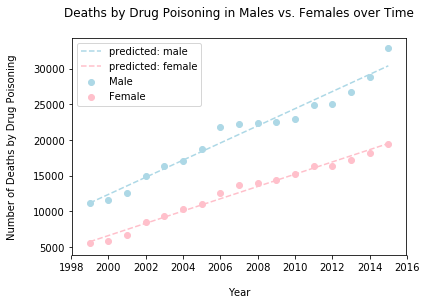

In [16]:
# Plot to show male, female death due to drug poisoning for all race and age groups per year

# MALE   - blue
x_male = list(df_male.Year.tolist())
y_male = list(df_male.Deaths.tolist())
plt.scatter(x_male, y_male, color='lightblue', label='Male')

# linear model - male
data_x_male =[[m] for m in x_male]     # x values need to be two dimensional for linear_model
reg_m = linear_model.LinearRegression()
reg_m.fit(data_x_male, y_male)
plt.plot(x_male, reg_m.predict(data_x_male), color='lightblue', linestyle='--', label='predicted: male')

# FEMALE  - pink
x_female = list(df_female.Year.tolist())
y_female = list(df_female.Deaths.tolist())
plt.scatter(x_female, y_female, color='pink', label='Female')

# linear model - female
data_x_female =[[f] for f in x_female]
reg= linear_model.LinearRegression()
reg.fit(data_x_female, y_female)
plt.plot(x_female, reg.predict(data_x_female), color='pink', linestyle='--', label='predicted: female')


# Print and view the slope linear regression lines for males and females 
print("Slope of the linear regression line:")
print('\tfor males: ', reg_m.coef_)
print('\tfor females: ', reg.coef_, "\n")

# Label the graphs
plt.title('Deaths by Drug Poisoning in Males vs. Females over Time\n')
plt.xlabel('\nYear')
plt.ylabel('Number of Deaths by Drug Poisoning\n')
plt.legend(loc='upper left')
plt.show()

<p>As shown in the data above, both death rates for males and females are steadily increasing through the years, although death rates are much higher in males than in females. Males average about 1201 increase in the number of deaths by drug poisoning per year, while females are only about 860 per year.</p>

<h3>2.4 Analyzing and Visualizing the Number of Deaths Based on Age Group</h3>
<p> From common knowledge, we can predict that some age groups (such as less than 15 years and 75+ years) are less exposed to drugs and therefore, have less mortality by drug poisoning. To see if these predictions are true, we will plot the number of deaths per year for age group.</p>

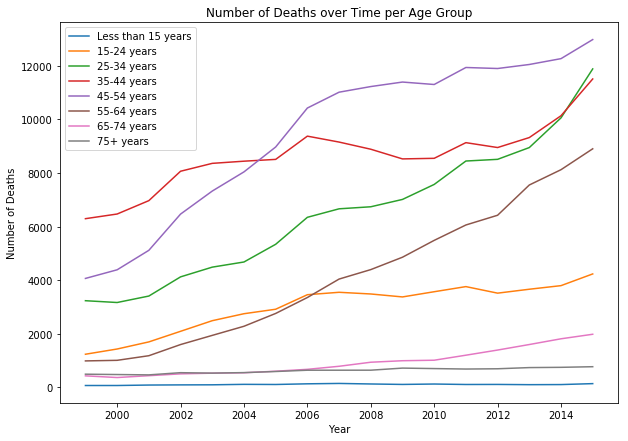

In [17]:
gr_age = df_age.groupby('Age')
plt.subplots(figsize=(10,7)) # Resizes the graph

# Plot each age group
for ag in df_age.Age.unique().tolist():
    temp_df = gr_age.get_group(ag)
    plt.plot(temp_df.Year.tolist(), temp_df.Deaths.tolist(), label=ag)

# Graph labels
plt.title('Number of Deaths over Time per Age Group')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.legend(loc='upper left')
plt.show()

As predicted, age groups less than 15 and greater than 75 have the lowest mortality. Age group 65-74 years is seeing a slight increase in mortality in recent years. Ages 15-24 has stabilized, shows little to no increase in recent years. The rest of the age groups have increased from 2006 onwards. The highest poisoning death rates are those from ages 45-54.

<a name="graph_race"></a><h3>2.5 Analyzing and Visualizing the Number of Deaths Per Race</h3>
<p> The race and origin categories given by the data are limited: Hispanic and Non-Hipanic (which is further broken down to Black and White). Other race groups are not included. We will plot the number of deaths for each race group vs. year. Similar to what was done for analysis of sex, we will be using linear model to determine average increase in number of deaths per each race category.</p>

Slope of regression line:
	 Hispanic :  [ 141.72303922]
	 Non-Hispanic Black :  [ 118.79901961]
	 Non-Hispanic White :  [ 1737.56372549]


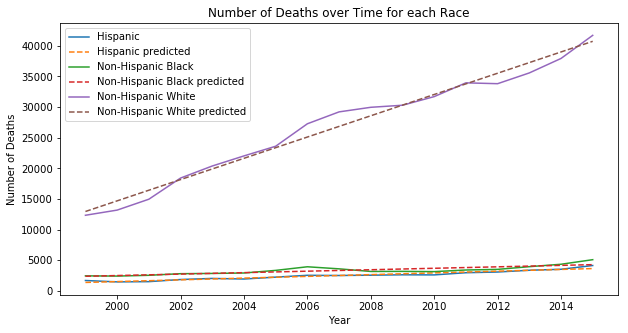

In [18]:
gr_race = df_race.groupby('Race and Hispanic Origin')
plt.subplots(figsize=(10,5))

# Plot each race and regression fit.
print('Slope of regression line:')
for ra in df_race['Race and Hispanic Origin'].unique().tolist():
    temp_df = gr_race.get_group(ra)
    plt.plot(temp_df.Year.tolist(), temp_df.Deaths.tolist(), label=ra)
    
    # Linear regression 
    reg_race = linear_model.LinearRegression()
    x_year = [[x] for x in temp_df.Year.tolist()]
    reg_race.fit(x_year, temp_df.Deaths)
    plt.plot(x_year, reg_race.predict(x_year), linestyle='--', label= ra + ' predicted')
    
    print ('\t',ra, ': ', reg_race.coef_)
    
plt.title('Number of Deaths over Time for each Race')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.legend(loc='upper left')
plt.show()

Based on the graph, Non-Hispanic Whites have the highest number of drug poisoning for each of the given years. They have about 1738 increase in mortality by drug poisoning per year, while Hispanics and Non-Hispanic Blacks average lower than 150 increase in mortality.

<h2>3. Machine Learning</h2>
<h4>Prediction model for the Number of Deaths Per Year</h4>
<p> In this part, we will explore multiple polynomial degree prediction models for the year dataframe in order to compare how well the model can predict the number of deaths for 2016, which is a year not included in the csv data above but has been published by the Center for Disease Control (CDC) recently and can be found <a href="https://www.cdc.gov/nchs/nvss/vsrr/drug-overdose-data.htm">here</a>.</p>

<h3>3.1 Determining the Best Degree Polynomial for Years 1999-2015</h3>
<p>As seen by the graph in the <a href="#year_graph">analysis section for year</a>, the number of deaths does not follow a linear line. As a result, when looking for a regression we need to compare multiple models (polynomials with different degrees) to find the best equation that can closely predict the number of deaths for each year. To do this, we will be using the polyfit() and polyval() from the Numpy library.</p>

<p>For the given degree, the squared $loss = average ((actual - predicted) ^ 2)$ is calculated to determine the best polynomial degree. The best polynomial fit, which is the one with minimum square loss, will be plotted to show how it visually compares to actual numbers of death. </p>

In [19]:
# First polyfit usually gives warning when exceeding degree of 4 -- we want to ignore warnings (done below)
import warnings
warnings.filterwarnings('ignore')

In [20]:
# Degrees from linear to degree of 15 -- this is a randomly picked number
# np.arange creates a list from 1 to 15 (its not inclusive of 16)
degree = np.arange(1, 16)  

# Squared loss - dictionary strucutre to hold the degree as key and the square loss as value
sqr_loss = {}

# For each degree do polyfit and polyval to predict the number of deaths for each year from the fitted equation
for deg in degree:
    pl = np.polyfit(df_year.Year, df_year.Deaths, deg)
    pv = np.polyval(pl, df_year.Year) 
    
    # Calculate squared loss by squaring the difference between actual and predicted for each year
    sqr_loss [deg] = ((np.array(df_year.Deaths) - pv) ** 2).mean(axis=None)
    
print('degree: squared loss' , sqr_loss)

degree: squared loss {1: 2363878.5945787369, 2: 2200801.3347953679, 3: 1663774.8586503034, 4: 498921.24633430032, 5: 499005.92168202117, 6: 497566.19393382355, 7: 497516.0487132353, 8: 497545.01436121325, 9: 497551.97387695313, 10: 497554.99494844326, 11: 497557.27737247245, 12: 497559.50421501609, 13: 497566.41287814872, 14: 497571.84232599597, 15: 497576.2769616071}


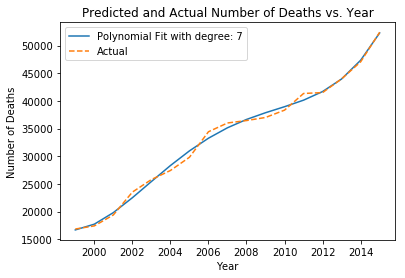

In [21]:
# Determine the minimum squared loss
min_sqr_loss = np.min(np.array(list(sqr_loss.values())))

# Degree corresponding to minimum squred loss
best_deg = 1
for key, val in sqr_loss.items():
    if val == min_sqr_loss:
        best_deg = key

# Plot the prediction from polyfit using the best degree 
pl_fit = np.polyfit(df_year.Year, df_year.Deaths, best_deg)
pv = np.polyval(pl_fit, df_year.Year)
plt.plot(df_year.Year, pv, label='Polynomial Fit with degree: ' + str(best_deg))
plt.plot(df_year.Year, df_year.Deaths, linestyle='--', label='Actual')

# Label plots
plt.title('Predicted and Actual Number of Deaths vs. Year')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.legend(loc='upper left')
plt.show()

<h3>3.2 Comparison of Prediction for 2016 to Actual Number of Deaths</h3>

<p> As shown by the plot above, the best degree polynomial is of degree 7. We will use this polyfit degree to predict for the number of deaths for the year 2016, which, as mentioned above, is not included in first csv file. We will then see how it compares to actual numbers obtained from a different data table by the CDC.</p>
<p> <i>Hypothesis</i>: In the last few years (2015-present), the rate of increase from drug overdose has been thought to increase at a far more rate than ever seen before; therefore, we can predict that the polynomial fit will underestimte the number of deaths. </p>

In [22]:
# Include 2016 into list of years to be predicted for (2017 is not included) -- 2016 prediction will be the last prediction from
# Polyval
x_years = np.arange(1999, 2017)
predict = np.polyval(pl_fit, x_years)
pred_2016 = predict[len(predict)-1]
print('Predicted number of deaths for 2016: ', pred_2016)

Predicted number of deaths for 2016:  59254.875


<h4>3.2.1 Obtaining Actual 2016 Number of Deaths</h4>
<p>Since the data containing the 2016 number of deaths is contained on another csv file (which can be downloaded <a href="https://www.cdc.gov/nchs/nvss/vsrr/drug-overdose-data.htm">here</a>), we will follow the same steps as the <a href="#collect">Data Collection and Wrangling</a> section, in order to get the file and transform it to a data frame. We will then use groupby to locate the row containing the number for December 2016 (end of year report). </p>

In [23]:
new_df = pd.read_csv("VSRR_Provisional_Drug_Overdose_Death_Counts.csv")
new_df.head()

,State,State Name,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,Footnote
0,AK,Alaska,2015,January,12 month-ending,Number of Deaths,"4,034",100,0.0,NaN
1,AK,Alaska,2015,February,12 month-ending,Number of Deaths,"4,084",100,0.0,NaN
2,AK,Alaska,2015,March,12 month-ending,Number of Deaths,"4,101",100,0.0,NaN
3,AK,Alaska,2015,April,12 month-ending,Number of Deaths,"4,133",100,0.0,NaN
4,AK,Alaska,2015,May,12 month-ending,Number of Deaths,"4,196",100,0.0,NaN


In [24]:
gr_us = new_df.groupby(['State Name', 'Year', 'Month', 'Indicator'])
df_2016 = gr_us.get_group(('United States', 2016, 'December', 'Number of Drug Overdose Deaths'))
df_2016

,State,State Name,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,Footnote
5359,US,United States,2016,December,12 month-ending,Number of Drug Overdose Deaths,"64,116",100,0.147854,NaN


In [25]:
resd_2016 = pred_2016 - 64116
print('Difference between predicted and actual:', resd_2016)

Difference between predicted and actual: -4861.125


<h4>3.2.2 Hypothesis Testing</h4>
<p> Our last step is to see whether the under-estimation of the prediction by 4860.921 (residual for 2016) number of deaths is just due to error in the polynomial fit model or significantly different from the error. </p>
<p> <i>Null hypothesis: </i> The polyfit will under-estimate prediction due to recent increase in overdose rates.</p>
<p> <i>Alternative hypothesis:</i> The polyfit will predict a significantly close value to the actual number.</p>
<p> In order to do this, we will look at the difference between predicted and actual values for years 1999-2015. We will then plot 2016 residual (predicted - actual) along with residuals for 1999-2015 to see if 2016 number is an outlier. </p>

In [26]:
# calculate prediction - actual and add as part of new column (residual)
df_year['residual'] = np.polyval(pl_fit, df_year.Year) - df_year.Deaths
df_year.head()

,Year,Sex,Age,Race and Hispanic Origin,State,Deaths,Population,rate_percent,residual
0,1999,Both Sexes,All Ages,All Races-All Origins,United States,16849,279040238,0.006038,-160.21875
1,2000,Both Sexes,All Ages,All Races-All Origins,United States,17415,281421906,0.006188,311.84375
2,2001,Both Sexes,All Ages,All Races-All Origins,United States,19394,284968955,0.006806,419.62500
3,2002,Both Sexes,All Ages,All Races-All Origins,United States,23518,287625193,0.008177,-1016.03125
4,2003,Both Sexes,All Ages,All Races-All Origins,United States,25785,290107933,0.008888,-355.53125


<p>Calculate statistics: mean, standard deviation of the residuals for 1999-2015 </p>

In [27]:
mean_num = np.mean(np.array(df_year.residual.tolist())) # Mean
std_num = np.std(np.array(df_year.residual.tolist())) # Standard Deviation
print('mean: ', mean_num, ' standard deviation: ', std_num)

mean:  0.669117647059  standard deviation:  705.347858149


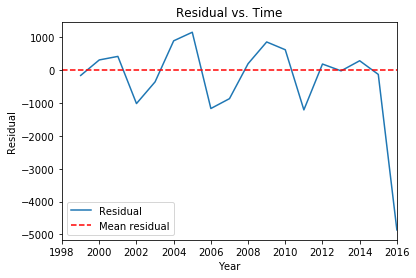

In [28]:
# Graphing residual vs. time
x = df_year.Year.tolist()
x.append(2016)
y = df_year.residual.tolist()
y.append(resd_2016)

plt.plot(x, y, label='Residual')
plt.xlim(1998, 2016)

# mean
plt.axhline(y=mean_num, linestyle='--', color='r', label='Mean residual')
plt.xlabel('Year')
plt.ylabel('Residual')
plt.title('Residual vs. Time')
plt.legend(loc='lower left')
plt.show()

<p> From the graph alone, we can tell that there is a significant difference in the prediction of 2016 by the polnomial fit than the years prior. We will do a chi-square test from scipy.stats library for the sake of confirmation of this observation.  The test will reveal the p-value, which can be used to reject or keep the null hypothesis. Generally, a p-value <= 0.5 can be used to reject the null hypothesis. </p>

In [29]:
# Chisquare test including the number of deaths including 2016
chisquare(y)

Power_divergenceResult(statistic=-114247.02069694316, pvalue=1.0)

<p> The p-value is approximately 1, which means that we keep our null hypothesis which states that the polyfit will under-estimate prediction due to recent increase in overdose rates. Interestingly, removing the number of deaths for year 2016 brings the pvalue close to 0 (shown below).</p>

In [30]:
# We will use slice to remove the value for 2016, which is stored last
chisquare(y[:len(y)-1])

Power_divergenceResult(statistic=12640176.587912088, pvalue=0.0)

<h2>Conclusions</h2>
<p>Based on the data, the increase in the mortality rate for drug poisoning differs by age group, race and sex. Males, Non-Hispancic White and those who are betweens the ages of 25-54 are more likely to die through drug poisoning than females, Hispanics and Non-Hispanic Blacks, and all other age groups.</p>

<p>While this tutorial demonstrates the data life cycle using Python and its various libraries, we think it's also important that it sheds light on the astonishing increase through the years in the amount of deaths caused by drug poisoning, and to know the causes behind it. Is it easy access to these drugs or the lack of providing rehabilitation from the government? There are so many possibilities, and it is vital that this issue gets more focus than what it currently has to save more lives. Maybe it would be a nice data science project for you to work on.</p>

<p>Thank you for going through our tutorial and we hope that this tutorial is helpful to you, both in learning about the data life cycle and about an important issue in our society.</p>

<h2><a name="references"></a>References</h2>
<ol>
    <li>First Data Set: <a href="https://catalog.data.gov/dataset/drug-poisoning-mortality-u-s-and-state-trends-united-states-20022014">NCHS_Drug_Poisoning_Mortality_by_State_United_States.csv</a>
    <li>Second Data Set: <a href="https://www.cdc.gov/nchs/nvss/vsrr/drug-overdose-data.htm"> VSRR_Provisional_Drug_Overdose_Death_Counts.csv</a>
    <li><a href="https://docs.docker.com/engine/installation/">Docker</a>
    <li><a href="https://conda.io/docs/user-guide/install/index.html">Anaconda</a>
    <li><a href="http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/">Pandas Tutorial</a></li>
    <li><a href="https://docs.scipy.org/doc/numpy-dev/user/quickstart.html">Numpy Tutorial</a></li>
    <li><a href="https://matplotlib.org/2.0.2/users/pyplot_tutorial.html">Matplotlib.pyplot Tutorial</a></li>
    <li><a href="http://scikit-learn.org/stable/">Scikit-learn Tutorial</a></li>
    <li><a href="https://plot.ly/python/choropleth-maps/">Plotly Tutorial</a>, really cool stuff!</li>
    <li><a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html">Scipy.stats chisquare</li>
    <li>Image credits: <a href="http://pinnacleemergency.co/drug-overdoses-and-accidental-poisoning/">http://pinnacleemergency.co/drug-overdoses-and-accidental-poisoning/</a>, <a href="http://www.womenshealth.northwestern.edu/blog/unintentional-drug-poisoning-rise">http://www.womenshealth.northwestern.edu/blog/unintentional-drug-poisoning-rise</a>, <a href="https://www.emedicinehealth.com/drug_overdose/article_em.htm">https://www.emedicinehealth.com/drug_overdose/article_em.htm</a>, <a href="https://drugabuse.com/library/drug-overdose/">https://drugabuse.com/library/drug-overdose/</a></li>
    
</ol>